In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Import the AerSimulator
from qiskit import transpile  # Import transpile to prepare the circuit for simulation
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the initial state to create a superposition
# We will create a state |ψ⟩ = 1/√2 (|00⟩ + |11⟩)
initial_state = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]

In [3]:
# Create a Quantum Circuit with 2 qubits
qc = QuantumCircuit(2)

In [4]:
# Initialize the qubits to the defined state
qc.initialize(initial_state, [0, 1])

In [5]:
# Include an instruction to save the statevector
qc.save_statevector()

In [6]:
# Draw the circuit
print("Quantum Circuit with Initialized State:")
print(qc.draw())

Quantum Circuit with Initialized State:
     ┌──────────────────────────────────┐ statevector 
q_0: ┤0                                 ├──────░──────
     │  Initialize(0.70711,0,0,0.70711) │      ░      
q_1: ┤1                                 ├──────░──────
     └──────────────────────────────────┘      ░      


In [7]:
# Setup the Aer simulator with statevector simulation explicitly enabled
simulator = AerSimulator(method="statevector")

In [8]:
# Transpile the circuit for the simulator
try:
    compiled_circuit = transpile(qc, simulator)
except Exception as e:
    print("Error during transpilation:", e)


In [9]:
# Simulate the circuit
try:
    result = simulator.run(compiled_circuit).result()
except Exception as e:
    print("Error during simulation:", e)

In [10]:
# Retrieve the statevector
try:
    statevector = result.get_statevector()
    print("Statevector after initialization:")
    print(statevector)

    # Plot the statevector probabilities
    counts = result.get_counts()
    plot_histogram(counts, title="State Probabilities")
    plt.show()

    # Visualize the statevector on a Bloch sphere
    plot_bloch_multivector(statevector, title="Bloch Sphere Representation")
    plt.show()
except Exception as e:
    print("Error during visualization:", e)

Statevector after initialization:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [11]:
# Plot the statevector probabilities
#plot_histogram(result.get_counts(), title="State Probabilities")

In [12]:
# Visualize the statevector on a Bloch sphere
#plot_bloch_multivector(statevector, title="Bloch Sphere Representation")

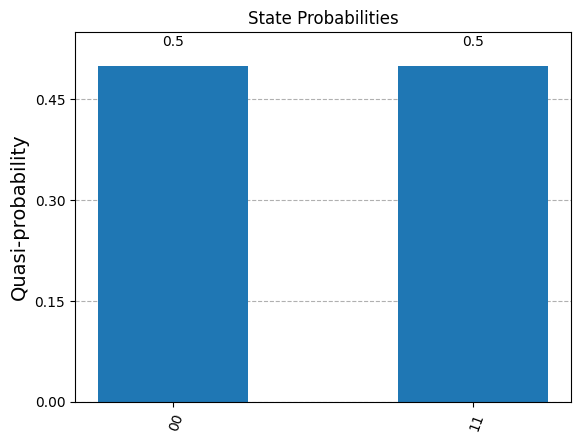

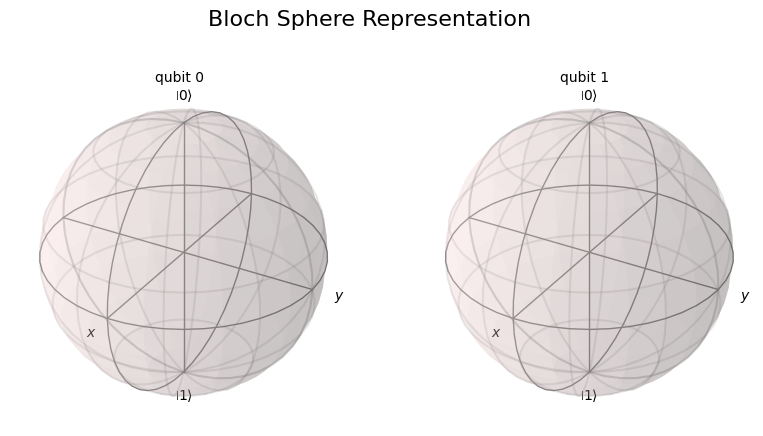

In [13]:
# Display plots if running in a Jupyter notebook environment
try:
    from IPython.display import display
    display(plot_histogram(result.get_counts(), title="State Probabilities"))
    display(plot_bloch_multivector(statevector, title="Bloch Sphere Representation"))
except ImportError:
    # Handle cases where IPython is not available
    print("IPython is not installed in your environment, please install it to display plots or run this code in a Jupyter notebook.")

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

In [15]:
# Setup Qiskit Runtime Service
service = QiskitRuntimeService()

In [16]:
# List available backends
print("\nAvailable Backends:")
print(service.backends())


Available Backends:
[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [17]:
# Select a backend
backend_name = "ibm_brisbane"  # Replace with your desired backend
backend = service.backend(backend_name)  # Assign the backend using the name
print(f"\nSelected Backend: {backend_name}")


Selected Backend: ibm_brisbane


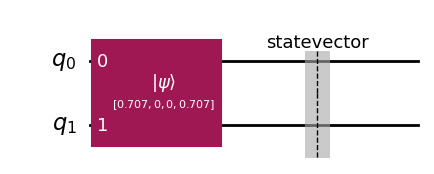

In [18]:
qc.draw('mpl')

In [19]:
# Instanciar el simulador Aer
#simulator = AerSimulator()

In [20]:
# Transpile the circuit for the selected backend
compiled_circuit = transpile(qc, backend)
print("\nTranspiled Circuit:")
print(compiled_circuit)

TranspilerError: "Unable to translate the operations in the circuit: ['reset', 'u', 'save_statevector', 'cx'] to the backend's (or manually specified) target basis: ['switch_case', 'measure', 'rz', 'delay', 'for_loop', 'x', 'reset', 'ecr', 'snapshot', 'store', 'if_else', 'sx', 'id', 'barrier']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.BasisTranslator#translation-errors"

In [ ]:
# Create a quantum circuit
qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
qc.h(0)  # Apply a Hadamard gate to the qubit
qc.measure(0, 0)  # Measure the qubit into the classical bit

In [ ]:
qc.draw('mpl')

In [ ]:
# Step 6: Use the Sampler primitive without specifying shots during initialization
sampler = Sampler(mode=backend)  # Initialize the Sampler without options

print("\nRunning the circuit...")

In [ ]:
# Execute the circuit with shots specified in the run() method
job = sampler.run([compiled_circuit], shots=1024)  # Pass circuits as the first positional argument
print("Waiting for results...")
result = job.result()  # Get the results

In [ ]:
# Retrieve the probability distribution from the measurements
counts = result.quasi_dists[0]
print("\nResults:")
print("Probability Distribution:", counts)

In [ ]:
# Since actual statevector might not be available directly through QiskitRuntimeService's Sampler,
# you would typically use local simulation to achieve this, as shown in the local Aer example above.